# Leap of Faith in PyTorch [L6] - Loss Function and Optimization in PyTorch (Day 6) - Demo

## 👉 [check it on Medium - Leap of Faith in PyTorch [L6] - Loss Function and Optimization in PyTorch (Day 6)]()

### Step 1: Model Architecture for Regression


Epoch 0, Loss: 1727.8507080078125
Epoch 100, Loss: 4.669765949249268
Epoch 200, Loss: 4.649200916290283
Epoch 300, Loss: 4.649190425872803
Epoch 400, Loss: 4.649200916290283
Epoch 500, Loss: 4.64919900894165
Epoch 600, Loss: 4.649169921875
Epoch 700, Loss: 4.6491618156433105
Epoch 800, Loss: 4.649176597595215
Epoch 900, Loss: 4.649158477783203


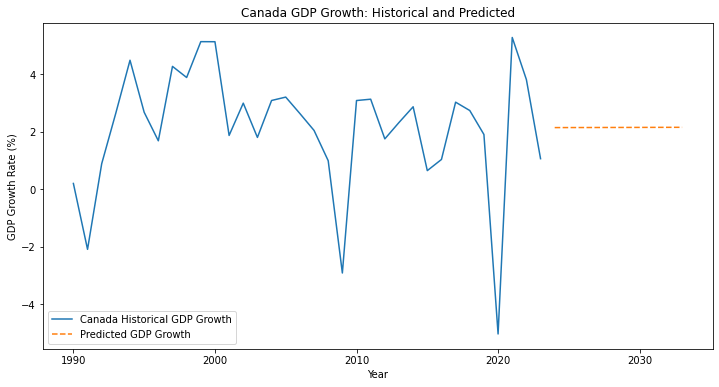

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt


# Step 1 - Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()


# Step 2 - Define a simple neural network for regression
class GDPGrowthNN(nn.Module):
    def __init__(self):
        super(GDPGrowthNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3 - Instantiate model, loss function, and optimizer
# Step 3.1 - Create an instance of your model 
model = GDPGrowthNN()

# Step 3.2 -  Loss function for regression
criterion = nn.MSELoss()  

# Step 3.3 - Using Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  

# Step 4 - Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    input_data = years.view(-1, 1)  # Year as input
    target_data = gdp_growth_data[:, 0].view(-1, 1)  # Target GDP growth for Canada
    
    # Forward pass
    outputs = model(input_data)
    loss = criterion(outputs, target_data)
    
    # Backpropagation and optimizer step
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 5 - Make predictions for future years
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_predictions = model(future_years)

# Step 6 - Plot the results
plt.figure(figsize=(12, 6))
plt.plot(years.numpy(), gdp_growth_data[:, 0].numpy(), label='Canada Historical GDP Growth')
plt.plot(np.arange(2024, 2034), future_predictions.numpy(), linestyle='--', label='Predicted GDP Growth')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Canada GDP Growth: Historical and Predicted')
plt.legend()
plt.show()


### Step 2: Classification Problem: Classifying GDP Growth into Categories

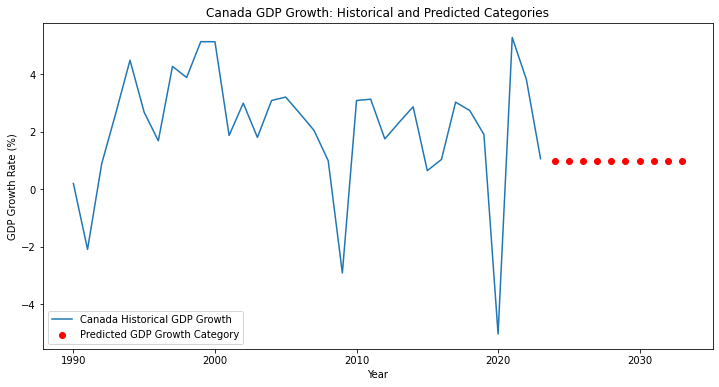

In [23]:
# Step 1 - Define a simple classifier
class GDPGrowthClassifier(nn.Module):
    def __init__(self):
        super(GDPGrowthClassifier, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 2 - Instantiate model, loss function, and optimizer
# Step 2.1 - Instantiate model
model_classifier = GDPGrowthClassifier()

# Step 2.1 - Loss function for classification
criterion_classifier = nn.CrossEntropyLoss()

# Step 2.1 - Using Adam optimizer
optimizer_classifier = optim.Adam(model_classifier.parameters(), lr=0.001)  

# Step 3 - Create classification labels based on GDP growth
gdp_growth_labels = torch.tensor([0 if x < 0 else 1 if x < 5 else 2 for x in gdp_growth_data[:, 0]])

# Step 4 - Training loop for classification
epochs = 1000
for epoch in range(epochs):
    model_classifier.train()
    optimizer_classifier.zero_grad()
    
    input_data = years.view(-1, 1)  # Year as input
    target_data = gdp_growth_labels  # Classification labels for Canada
    
    # Forward pass
    outputs = model_classifier(input_data)
    loss = criterion_classifier(outputs, target_data)
    
    # Backpropagation and optimizer step
    loss.backward()
    optimizer_classifier.step()
    
    if epoch % 1000 == 0 and epoch != 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 5 - Make predictions for future years
model_classifier.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_predictions_class = model_classifier(future_years)

# Step 6 - Convert logits to class labels
_, predicted_classes = torch.max(future_predictions_class, 1)

# Step 7 - Plot the results
plt.figure(figsize=(12, 6))
plt.plot(years.numpy(), gdp_growth_data[:, 0].numpy(), label='Canada Historical GDP Growth')
plt.scatter(np.arange(2024, 2034), predicted_classes.numpy(), color='red', label='Predicted GDP Growth Category')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Canada GDP Growth: Historical and Predicted Categories')
plt.legend()
plt.show()


### Step 3: Adapt classification initiation and evaluation for all countries

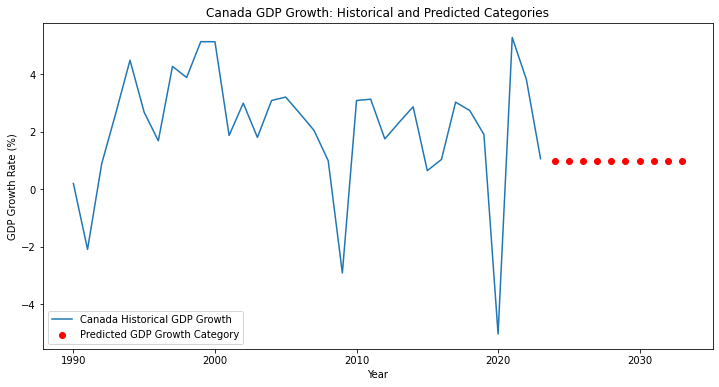

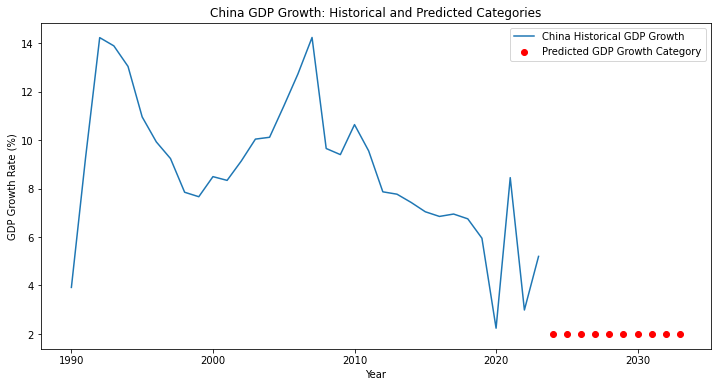

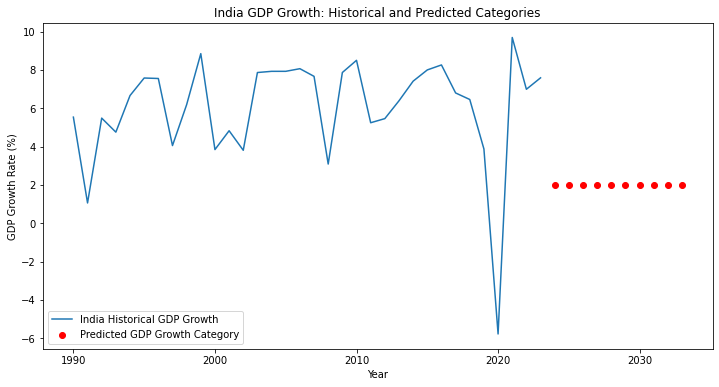

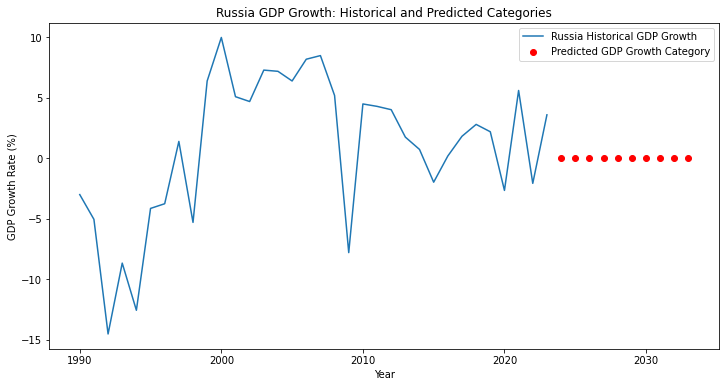

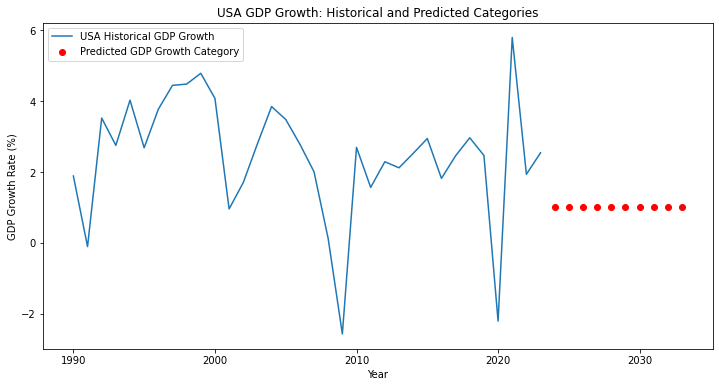

[('Canada', tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])), ('China', tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])), ('India', tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])), ('Russia', tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), ('USA', tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))]


In [26]:
def predict_per_country(country_idx, country_name):
    # Create classification labels based on GDP growth
    gdp_growth_labels = torch.tensor([0 if x < 0 else 1 if x < 5 else 2 for x in gdp_growth_data[:, country_idx]])
    
    # Training loop for classification
    epochs = 1000
    for epoch in range(epochs):
        model_classifier.train()
        optimizer_classifier.zero_grad()
        
        input_data = years.view(-1, 1)  # Year as input
        target_data = gdp_growth_labels  # Classification labels for given country
        
        # Forward pass
        outputs = model_classifier(input_data)
        loss = criterion_classifier(outputs, target_data)
        
        # Backpropagation and optimizer step
        loss.backward()
        optimizer_classifier.step()
        
        if epoch % 1000 == 0 and epoch != 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    # Make predictions for future years
    model_classifier.eval()
    with torch.no_grad():
        future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
        future_predictions_class = model_classifier(future_years)
    
    # Convert logits to class labels
    _, predicted_classes = torch.max(future_predictions_class, 1)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(years.numpy(), gdp_growth_data[:, country_idx].numpy(), label=country_name + ' Historical GDP Growth')
    plt.scatter(np.arange(2024, 2034), predicted_classes.numpy(), color='red', label='Predicted GDP Growth Category')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth Rate (%)')
    plt.title(country_name + ' GDP Growth: Historical and Predicted Categories')
    plt.legend()
    plt.show()

    return predicted_classes


COUNTRIES = [(0, 'Canada'), (1, 'China'), (2, 'India'), (3, 'Russia'), (4, 'USA')]
predicted = []

for idx, name in COUNTRIES:
    predicted_classes = predict_per_country(idx, name)
    predicted.append((name, predicted_classes))
    

print(predicted)